# Due July/4/2018 11:59:59 PM, PST.

### Kernel (10%)

Could you prove or disprove by counter example about following constructed functions (left hand side) are kernels or not? All right hand side functions $K_$ are assumed kernels already. Notaions: $x, z$ are $n$-dim vectors. $a$ is a positive real number. $f : \mathbb{R}^{n} -> \mathbb{R}$ is a real-valued function. $\phi : \mathbb{R}^{n} -> \mathbb{R}^{n}$ is a $n$-dim to $n$-dim function.  

(a) $K(x; z) = K_1(x; z) + K_2(x; z)$
<br>
(b) $K(x; z) = K_1(x; z) - K_2(x; z)$
<br>
(c) $K(x; z) = aK_1(x; z)$
<br>
(d) $K(x; z) = -aK_1(x; z)$
<br>
(e) $K(x; z) = K_1(x; z)K_2(x; z)$
<br>
(f) $K(x; z) = f(x)f(z)$
<br>
(g) $K(x; z) = K_3(\phi(x); \phi(z))$
<br>
(h) $K(x; z) = p(K_1(x; z))$, where $p$ is a polynomial



Please refer to the pdf attached in the canvas submissions.

### VC Dimension (10%)

(a) Let two hypothesis classes $H_1$ and $H_2$ satisfy $H_1 \in H_2$. Prove or disprove: $VC(H_1) \leq VC(H_2)$.

(b) Let $H_1 = H_2 \cup H_3$. Prove or disprove: $VC(H_1) \leq  VC(H_2) + VC(H_3)$.

a) True. Suppose VC(H1) = x. Then there exists a set of x points that is satisfied by 
H1 (i.e., for each possible labeling of the d points, there exists a hypothesis h ∈ H 1 which
realizes that labeling). Now, since H2 contains all hypotheses in H1, then H2 satisfies 
the same set, and thus we have VC(H2)≥d=V C(H1).

### Building Decision Tree (30%)

In this assignment, we try to build decision tree from scratch. We will separate this task into following subtasks.
1. Gini Index

2. Create Split based on Gini Index

3. Build Tree

4. Make a Prediction

5. Case study by Decision Tree Built


### 1. Gini Index

A Gini score gives an idea of how good a split is by measuring how mixed the classes are in the two groups created by the split. A gini index for classifying two classes (attributes) into two groups can be represented as 

$$
\begin{align}
gini_{index} &= propor\_class\_0\_at\_gp\_1 \times (1 - propor\_class\_0\_at\_gp\_1)) \\
             &+ propor\_class\_1\_at\_gp\_1 \times (1 - propor\_class\_1\_at\_gp\_1)) \\
             &+ propor\_class\_0\_at\_gp\_2 \times (1 - propor\_class\_0\_at\_gp\_2)) \\
             &+ propor\_class\_1\_at\_gp\_2 \times (1 - propor\_class\_1\_at\_gp\_2))
\end{align}
$$

You can try use groups of datasets and class values as input, and return gini index based.


In [4]:
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini

print(gini_index([[[1, 1], [1, 0]], [[1, 1], [1, 0]]], [0, 1]))
print(gini_index([[[1, 0], [1, 0]], [[1, 1], [1, 1]]], [0, 1]))

0.5
0.0


### 2. Create Split based on Gini Index

In this part, you will try to split a dataset and evaluate all splits to select best feature and its best splitting point. Best means to have smallest gini index.

Given following data with 10 rows and each row contains two features X1 and X2, label by variable Y (0 or 1). Could you write a code to fine the best feature and best splitting points? 


In [6]:
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini
 
# Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}
 

In [7]:
# [X1, X2, Y] 
dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]
split = get_split(dataset)
print('Split: [X%d < %.3f]' % ((split['index']+1), split['value']))

X1 < 2.771 Gini=0.444
X1 < 1.729 Gini=0.500
X1 < 3.678 Gini=0.286
X1 < 3.961 Gini=0.167
X1 < 2.999 Gini=0.375
X1 < 7.498 Gini=0.286
X1 < 9.002 Gini=0.375
X1 < 7.445 Gini=0.167
X1 < 10.125 Gini=0.444
X1 < 6.642 Gini=0.000
X2 < 1.785 Gini=0.500
X2 < 1.170 Gini=0.444
X2 < 2.813 Gini=0.320
X2 < 2.620 Gini=0.417
X2 < 2.209 Gini=0.476
X2 < 3.163 Gini=0.167
X2 < 3.339 Gini=0.444
X2 < 0.477 Gini=0.500
X2 < 3.235 Gini=0.286
X2 < 3.320 Gini=0.375
Split: [X1 < 6.642]


### 3. Build Tree
Building a tree may be divided into 3 main parts:
A. Terminal Nodes. (Can use two criteriosn, (1) maximum tree depth or (2) use minimum rows required to be contained by a node)
B. Recursive Splitting.
C. Building a Tree.

For same dataset as above, could you show a tree with depth 2? 

In [8]:
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini
 
# Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)
 
# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root
 
# Print a decision tree
def print_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))
 

In [9]:
# [X1, X2, Y] 
dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]
tree = build_tree(dataset, 2, 1)
print_tree(tree)

[X1 < 6.642]
 [X1 < 2.771]
  [0]
  [0]
 [X1 < 7.498]
  [1]
  [1]


### 4. Make a Prediction
Given following test dataset, could you use the just built tree to make prediction?  

In [10]:
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']

In [11]:
test_dataset = [[1.771244718,1.784783929,0],
           [2.728571309,1.169761413,0],
[2.678319846,2.81281357,0],
[2.961043357,2.61995032,0],
[2.999208922,2.209014212,0],
[0.497545867,3.162953546,0],
[8.00220326,3.339047188,1],
[8.444542326,0.476683375,1],
[10.12493903,3.234550982,1],
[7.642287351,3.319983761,1]]
stump = {'index': 0, 'right': 1, 'value': 6.642287351, 'left': 0}
for row in dataset:
    prediction = predict(stump, row)
    print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


### 5. Case study by Decision Tree Built

Using the provided dataset about banknote authentication (data_banknote_authentication.csv) file
with following attributes. Please using developed decision tree to make prediction and evaluate your model.



In [13]:
from random import seed
from random import randrange
from csv import reader
 
# Load a CSV file
def load_csv(filename):
    file = open(filename, "rb")
    lines = reader(file)
    dataset = list(lines)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini
 
# Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root
 
# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']
 
# Classification and Regression Tree Algorithm
def decision_tree(train, test, max_depth, min_size):
    tree = build_tree(train, max_depth, min_size)
    predictions = list()
    for row in test:
        prediction = predict(tree, row)
        predictions.append(prediction)
    return(predictions)
 
# Test CART on Bank Note dataset
seed(1)
# load and prepare data
filename = 'data_banknote_authentication.csv'
dataset = load_csv(filename)
# convert string attributes to integers
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
# evaluate algorithm
n_folds = 5
max_depth = 5
min_size = 10
scores = evaluate_algorithm(dataset, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [95.62043795620438, 97.8102189781022, 97.8102189781022, 94.52554744525547, 98.90510948905109]
Mean Accuracy: 96.934%


### SVM Classifier (20%)
### Given iris data set (at sklearn datasets), could you compare classification results by plotting decision boundary for classifiers  linear, RBF (set kernel coefficient 5), and Polynomial (set degree 2) ? You can utilze sklearn svm. 

(dtype('float64'), dtype('int32'))
((150L, 2L), (150L,))


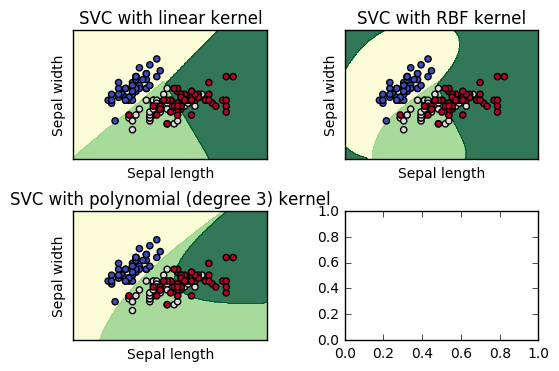

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def plot_contours(ax, clf, xx, yy, **params):
# Plot the decision boundaries for a classifier.

#     Parameters
#     ----------
#     ax: matplotlib axes object
#     clf: a classifier
#     xx: meshgrid ndarray
#     yy: meshgrid ndarray
#     params: dictionary of params to pass to contourf, optional
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def make_meshgrid(x, y, h=.02):
#     Create a mesh of points to plot in

#     Parameters
#     ----------
#     x: data to base x-axis meshgrid on
#     y: data to base y-axis meshgrid on
#     h: stepsize for meshgrid, optional

#     Returns
#     -------
#     xx, yy : ndarray
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

#importing the data
iris_data = datasets.load_iris();
X = iris_data.data[:, :2]
y = iris_data.target
print(X.dtype, y.dtype);
print(X.shape, y.shape);


#Linear SVM Classifier
C = 1 #Regularization Parameter
model_linear = svm.SVC(kernel = 'linear',C=C)
model_linear_res = model_linear.fit(X,y)
models_res = []
models_res.insert(0,model_linear_res)

model_rbf = svm.SVC(kernel = 'rbf',gamma=0.7, C=C)
model_rbf_res = model_rbf.fit(X,y)
models_res.insert(1,model_rbf_res)

model_poly = svm.SVC(kernel='poly',degree = 3, C=C)
model_poly_res = model_poly.fit(X,y)
models_res.insert(2,model_poly_res)

titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models_res, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.YlGn , alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Bootstrap Aggregation (30%)

Decision trees are a simple and powerful predictive modeling technique, but they often have high-variance problem. In this exercise, we will implement a bootstrap aggregation algorithm for decision trees. We will implment sample with replacement and use this to build a serieous of tree models for prediction. 

### Bootstrap Resample (With Replacement)

Can you write a function to implement resampling with replacement? 
For example, could you show different sample mean for different sample sizes for 
following data?  

In [14]:
from random import seed
from random import random
from random import randrange
 
 
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio=1.0):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample
 
 
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers) / float(len(numbers))
 
 
seed(1)
# True mean
dataset = [[randrange(10)] for i in range(20)]
print('True Mean: %.3f' % mean([row[0] for row in dataset]))
# Estimated means
ratio = 0.10
for size in [1, 10, 100]:
    sample_means = list()
    for i in range(size):
        sample = subsample(dataset, ratio)
        sample_mean = mean([row[0] for row in sample])
        sample_means.append(sample_mean)
    print('Samples=%d, Estimated Mean: %.3f' % (size, mean(sample_means)))

True Mean: 4.450
Samples=1, Estimated Mean: 4.500
Samples=10, Estimated Mean: 3.300
Samples=100, Estimated Mean: 4.480


### Building aggregated tree models.

Could you use samples with replacement to bagging predict the data (sonar.all-data.csv)?
Try to compare accuracy results for different bags size. For example, compare
average prediction results for bags with tree numbers say, 1, 5, 10, 50.

Data attributes, more details can be found at https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)



In [16]:
from random import seed
from random import randrange
from csv import reader
 
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
 
# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for i in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
    folds = cross_validation_split(dataset, n_folds)
    scores = list()
    for fold in folds:
        train_set = list(folds)
        train_set.remove(fold)
        train_set = sum(train_set, [])
        test_set = list()
        for row in fold:
            row_copy = list(row)
            test_set.append(row_copy)
            row_copy[-1] = None
        predicted = algorithm(train_set, test_set, *args)
        actual = [row[-1] for row in fold]
        accuracy = accuracy_metric(actual, predicted)
        scores.append(accuracy)
    return scores
 
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini
 
# Select the best split point for a dataset
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
        # for i in range(len(dataset)):
        # 	row = dataset[randrange(len(dataset))]
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    # check for a no split
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    # check for max depth
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    # process left child
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    # process right child
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)
 
# Build a decision tree
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root
 
# Make a prediction with a decision tree
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']
 
# Create a random subsample from the dataset with replacement
def subsample(dataset, ratio):
    sample = list()
    n_sample = round(len(dataset) * ratio)
    while len(sample) < n_sample:
        index = randrange(len(dataset))
        sample.append(dataset[index])
    return sample
 
# Make a prediction with a list of bagged trees
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)
 
# Bootstrap Aggregation Algorithm
def bagging(train, test, max_depth, min_size, sample_size, n_trees):
    trees = list()
    for i in range(n_trees):
        sample = subsample(train, sample_size)
        tree = build_tree(sample, max_depth, min_size)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return(predictions)
 
# Test bagging on the sonar dataset
seed(1)
# load and prepare data
filename = 'sonar.all-data.csv'
dataset = load_csv(filename)
# convert string attributes to integers
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)
# evaluate algorithm
n_folds = 5
max_depth = 6
min_size = 2
sample_size = 0.50
for n_trees in [1, 5, 10, 50]:
    scores = evaluate_algorithm(dataset, bagging, n_folds, max_depth, min_size, sample_size, n_trees)
    print('Trees: %d' % n_trees)
    print('Scores: %s' % scores)
    print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Trees: 1
Scores: [63.41463414634146, 70.73170731707317, 68.29268292682927, 78.04878048780488, 75.60975609756098]
Mean Accuracy: 71.220%
Trees: 5
Scores: [68.29268292682927, 65.85365853658537, 65.85365853658537, 73.17073170731707, 85.36585365853658]
Mean Accuracy: 71.707%
Trees: 10
Scores: [60.97560975609756, 73.17073170731707, 80.48780487804879, 70.73170731707317, 70.73170731707317]
Mean Accuracy: 71.220%
Trees: 50
Scores: [80.48780487804879, 75.60975609756098, 78.04878048780488, 90.2439024390244, 70.73170731707317]
Mean Accuracy: 79.024%
